#### Definition
1. mm, s, radian, keV unless specified otherwise in the plot 
3. The coordinate convention of this simulation and its relation to XPP coordinate is 
    (axis 0, axis 1, axis 2) = (vertical, horizontal, propagation) = (xpp y, xpp x, xpp z) 

np.fft(field) = spectrum

np.ifft(spectrum) = field

# Important !!!

In [1]:
import sys

sys.path.append("../../../")

import numpy as np
import matplotlib.pyplot as plt
from XRaySimulation import util, DeviceSimu, Pulse

import Controller
import parser

plt.rcParams.update({'font.size': 12})

## 1. Start the simulation

In [2]:
# Create a controller object as we have at XPP
x = Controller.XppController()

sase_source = Pulse.saseSource(nx=32, ny=32, nz=1024,
                               dx=4, dy=4, dz=0.1, Ec=11.0,
                               mean_pulse_energy_uJ=600,  # uJ.  10 uJ / 0.5eV * 30 eV = 600 uJ
                               pulse_energy_sigma_uJ=100,
                               # SASE energy fluctuation. Not the fluctuation after the xpp mono
                               n_gaussian=500,
                               mode_size_x=15,
                               mode_size_y=15,
                               mode_size_z=0.15 * util.c,
                               mode_center_spread_x=20,
                               mode_center_spread_y=20,
                               mode_center_spread_z=20 * util.c,
                               x0=np.array([0, -50e3, -30e6]))

Create a XA10A motor, moving along x rotation_axis.
Create a XA10A motor, moving along y rotation_axis.
Create a RA10A motor, rotating around y rotation_axis.
Create a SA07A motor, rotating around z rotation_axis.
Create a XA10A motor, moving along x rotation_axis.
Create a XA10A motor, moving along y rotation_axis.
Create a RA10A motor, rotating around y rotation_axis.
Create a SA07A motor, rotating around z rotation_axis.
Create a XA10A motor, moving along x rotation_axis.
Create a XA10A motor, moving along y rotation_axis.
Create a RA10A motor, rotating around y rotation_axis.
Create a SA07A motor, rotating around z rotation_axis.
Create a XA10A motor, moving along x rotation_axis.
Create a XA10A motor, moving along y rotation_axis.
Create a RA10A motor, rotating around y rotation_axis.
Create a SA07A motor, rotating around z rotation_axis.
Create a XA10A motor, moving along x rotation_axis.
Create a XA10A motor, moving along y rotation_axis.
Create a RA10A motor, rotating around y 

### Define functions on the fly

In [3]:
def move_vcc_zero():
    _ = x.t2.x_umv(0)
    _ = x.t3.x_umv(0)
    
def move_vcc(val):
    _ = x.t2.x_umvr(val)
    _ = x.t3.x_umvr(-val)

def move_delay0(val):
    _ = x.t2.x_umvr(val)
    _ = x.t3.x_umvr(val)

def move_delay(val):
    _ = x.t45.delay_umvr(val)

### Preparation: Align the mono

Motor moved from 0.00000 to -15.88396 degree
Motor moved from 0.00000 to -15.88402 degree


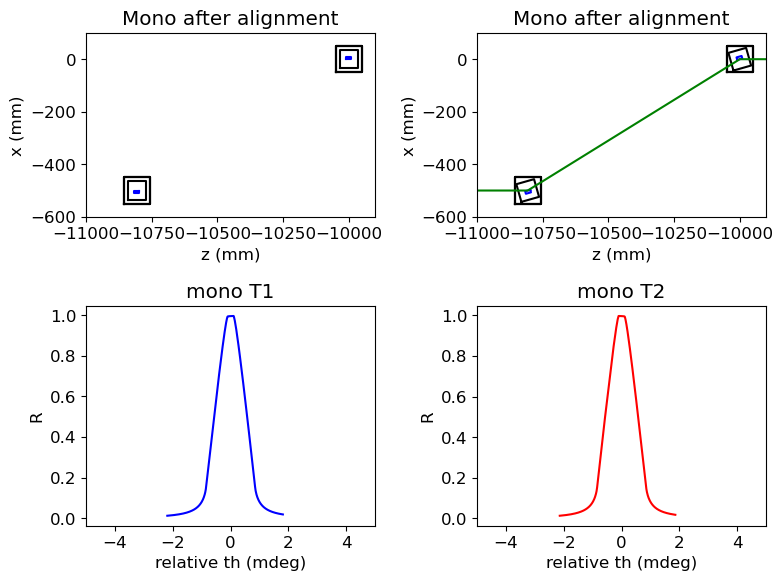

In [4]:
# Prepare a canvas. This section is not important. 
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(6)
fig.set_figwidth(8)

# show mono before alignment
x.plot_mono_optics(ax=ax[0, 0],  xlim=([-11000, -9900]))

# show mono after alignment
_ = x.align_xpp_mono()
x.plot_mono_optics(ax=ax[0, 1], xlim=([-11000, -9900]), show_trajectory=True)
x.plot_mono_rocking(ax_mono_t1=ax[1, 0], ax_mono_t2=ax[1, 1])

plt.tight_layout()
plt.show()

### Preparation: Align the miniSD

0.29789430707556436
Motor moved from 0.00000 to 17.07530 degree
Motor moved from 0.00000 to 17.06245 degree
Motor moved from 0.00000 to 17.06226 degree
Motor moved from 0.00000 to 17.07636 degree
Motor moved from 0.00000 to 17.07631 degree
Motor moved from 0.00000 to 17.06227 degree


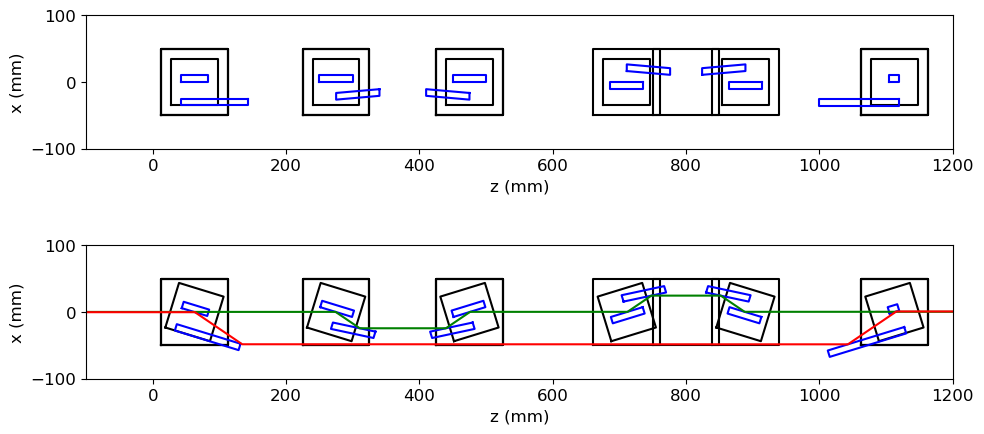

In [5]:
# Prepare a canvas. This section is not important. 
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.set_figheight(5)
fig.set_figwidth(10)

#     Before alignment
x.plot_miniSD_table(ax=ax[0], xlim=None, ylim=None, show_trajectory=False)

#     After alignment

_ = x.align_miniSD()
x.plot_miniSD_table(ax=ax[1], xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

0.29789430707556436
Get the most updated rocking curve around current location.


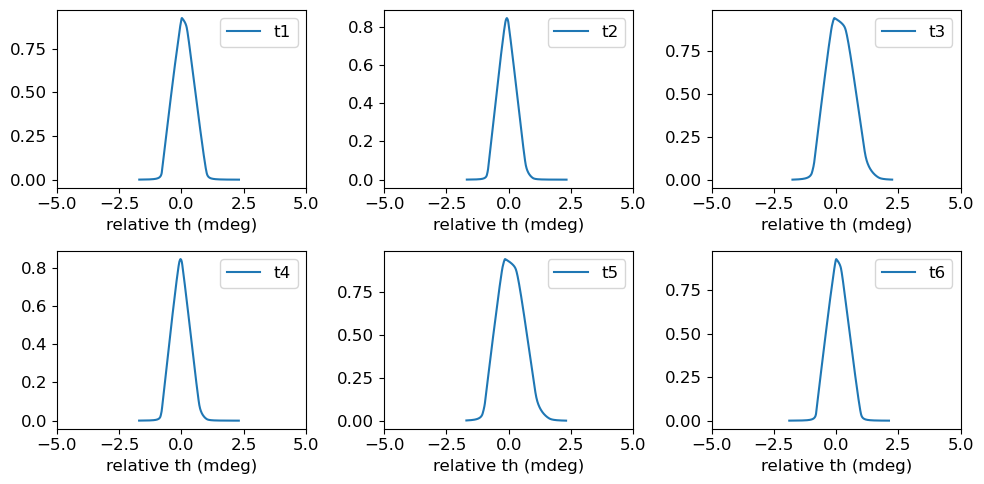

In [6]:
fig, ax = plt.subplots(ncols=3, nrows=2)
fig.set_figheight(5)
fig.set_figwidth(10)

x.plot_miniSD_rocking(ax_list=np.reshape(ax, 6))

plt.tight_layout()
plt.show()

In [7]:
t2th = x.t2.th.user_getPosition()
t3th = x.t3.th.user_getPosition()
t4th = x.t45.th1.user_getPosition()
t5th = x.t45.th2.user_getPosition()

# Calculate the kout change and the overlapped rocking curve

In [8]:
kout_ref = x.get_vcc_kout()

In [9]:
# Calculate the combined reflecitivity of each crystal
ref_dict = x.get_reflectivity()

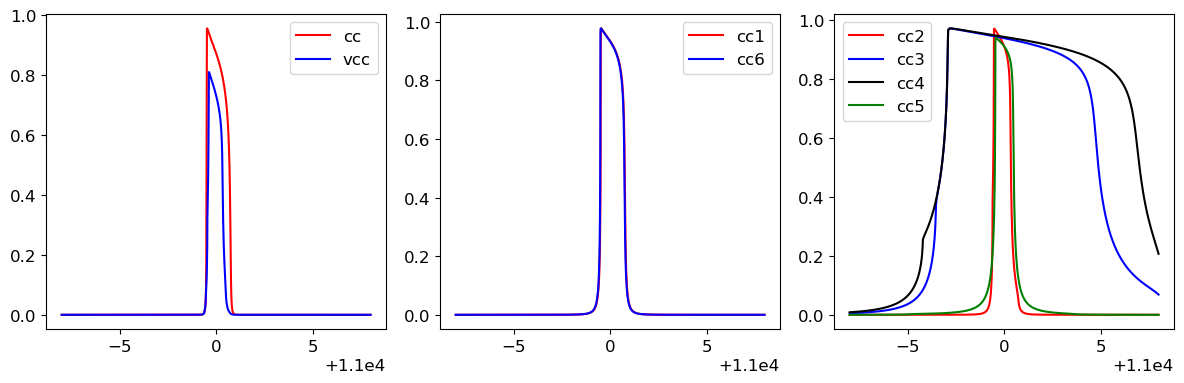

In [10]:
fig, axes = plt.subplots(ncols=3, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(12)

axes[0].plot(ref_dict['energy'] * 1e3, ref_dict['cc'], color='red', label='cc')
axes[0].plot(ref_dict['energy'] * 1e3, ref_dict['vcc'], color='blue', label='vcc')
axes[0].legend()

axes[1].plot(ref_dict['energy'] * 1e3, ref_dict['cc1'], color='red', label='cc1')
axes[1].plot(ref_dict['energy'] * 1e3, ref_dict['cc6'], color='blue', label='cc6')
axes[1].legend()

axes[2].plot(ref_dict['energy'] * 1e3, ref_dict['cc2'], color='red', label='cc2')
axes[2].plot(ref_dict['energy'] * 1e3, ref_dict['cc3'], color='blue', label='cc3')
axes[2].plot(ref_dict['energy'] * 1e3, ref_dict['cc4'], color='black', label='cc4')
axes[2].plot(ref_dict['energy'] * 1e3, ref_dict['cc5'], color='green', label='cc5')
axes[2].legend()

plt.tight_layout()
plt.show()

### Finally, we have the rocking curve and reflectivity of the two X-ray pulses. 
What I would like to do next is to find the relation between the crystal motion and the reflectivity

Motor moved from 17.06226 to 17.06226 degree
Motor moved from 17.07646 to 17.07646 degree
Motor moved from 17.07631 to 17.07641 degree
Motor moved from 17.06237 to 17.06227 degree


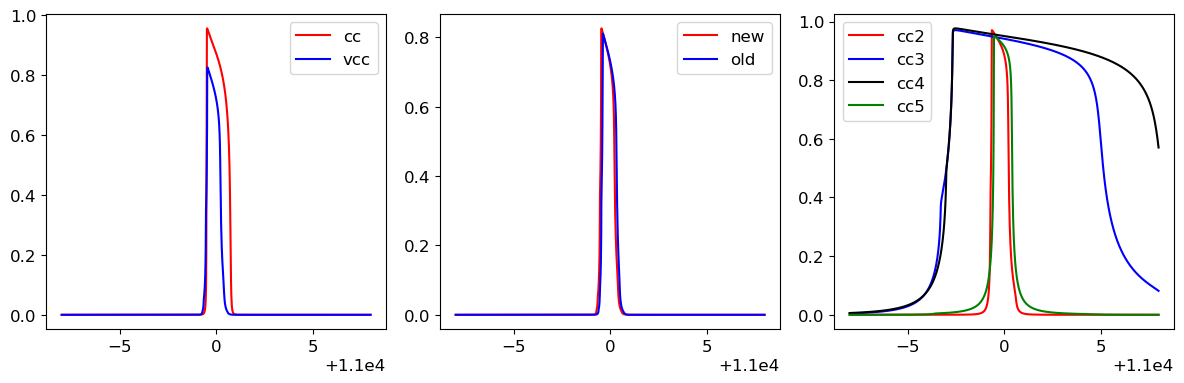

In [14]:
delta = np.deg2rad(1e-4)
delta_vec = [0, delta, delta, 0]

x.t2.th_umv(t2th + delta_vec[0])
x.t3.th_umv(t3th + delta_vec[1])
x.t45.th1_umv(t4th + delta_vec[2])
x.t45.th2_umv(t5th + delta_vec[3])

ref_dict_new = x.get_reflectivity()
fig, axes = plt.subplots(ncols=3, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(12)

axes[0].plot(ref_dict_new['energy'] * 1e3, ref_dict_new['cc'], color='red', label='cc')
axes[0].plot(ref_dict_new['energy'] * 1e3, ref_dict_new['vcc'], color='blue', label='vcc')
axes[0].legend()

axes[1].plot(ref_dict_new['energy'] * 1e3, ref_dict_new['vcc'], color='red', label='new')
axes[1].plot(ref_dict['energy'] * 1e3, ref_dict['vcc'], color='blue', label='old')
axes[1].legend()

axes[2].plot(ref_dict_new['energy'] * 1e3, ref_dict_new['cc2'], color='red', label='cc2')
axes[2].plot(ref_dict_new['energy'] * 1e3, ref_dict_new['cc3'], color='blue', label='cc3')
axes[2].plot(ref_dict_new['energy'] * 1e3, ref_dict_new['cc4'], color='black', label='cc4')
axes[2].plot(ref_dict_new['energy'] * 1e3, ref_dict_new['cc5'], color='green', label='cc5')
axes[2].legend()

plt.tight_layout()
plt.show()